In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Load preprocessed data
df = pd.read_csv('preprocessed_data.csv')

# Define features and target
X = df
y = pd.read_csv('train_hsbc_df.csv')['fraud']  # Load target variable from the original CSV

# Define GAN components
def build_generator(latent_dim, input_dim):
    model = Sequential([
        Dense(128, input_dim=latent_dim),
        LeakyReLU(alpha=0.2),
        BatchNormalization(),
        Dense(256),
        LeakyReLU(alpha=0.2),
        BatchNormalization(),
        Dense(512),
        LeakyReLU(alpha=0.2),
        BatchNormalization(),
        Dense(1024),
        LeakyReLU(alpha=0.2),
        BatchNormalization(),
        Dense(input_dim, activation='tanh')  # Output layer with same shape as input
    ])
    return model

def build_discriminator(input_dim):
    model = Sequential([
        Dense(1024, input_dim=input_dim),
        LeakyReLU(alpha=0.2),
        Dense(512),
        LeakyReLU(alpha=0.2),
        Dense(256),
        LeakyReLU(alpha=0.2),
        Dense(128),
        LeakyReLU(alpha=0.2),
        Dense(1, activation='sigmoid')  # Binary classification
    ])
    return model

def build_gan(generator, discriminator):
    discriminator.compile(optimizer=Adam(learning_rate=0.0002, beta_1=0.5), loss='binary_crossentropy', metrics=['accuracy'])
    gan = Sequential([generator, discriminator])
    gan.compile(optimizer=Adam(learning_rate=0.0002, beta_1=0.5), loss='binary_crossentropy')
    return gan

# Hyperparameters
latent_dim = 100
input_dim = X.shape[1]
batch_size = 64
epochs = 10

# Build GAN
generator = build_generator(latent_dim, input_dim)
discriminator = build_discriminator(input_dim)
gan = build_gan(generator, discriminator)

# Training GAN
def train_gan(generator, discriminator, gan, X_train, epochs, batch_size):
    for epoch in range(epochs):
        # Generate fake data
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        generated_data = generator.predict(noise)
        
        # Train discriminator
        real_data = X_train[np.random.randint(0, X_train.shape[0], batch_size)]
        labels_real = np.ones((batch_size, 1))
        labels_fake = np.zeros((batch_size, 1))
        
        d_loss_real = discriminator.train_on_batch(real_data, labels_real)
        d_loss_fake = discriminator.train_on_batch(generated_data, labels_fake)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
        
        # Train generator
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        labels_gan = np.ones((batch_size, 1))
        g_loss = gan.train_on_batch(noise, labels_gan)
        
        print(f"Epoch {epoch+1}/{epochs} | D Loss: {d_loss[0]} | D Accuracy: {100*d_loss[1]} | G Loss: {g_loss}")

# Prepare data
X_scaled = StandardScaler().fit_transform(X)  # Ensure that the data is scaled
X_train, _ = train_test_split(X_scaled, test_size=0.2, random_state=42)

# Train GAN
train_gan(generator, discriminator, gan, X_train, epochs, batch_size)


C:\Users\Vaahnitha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\Vaahnitha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step 
Epoch 1/10 | D Loss: 0.7328264713287354 | D Accuracy: 10.9375 | G Loss: [array(0.7235069, dtype=float32), array(0.7235069, dtype=float32), array(0.125, dtype=float32)]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Epoch 2/10 | D Loss: 0.6807674169540405 | D Accuracy: 37.23958134651184 | G Loss: [array(0.6862931, dtype=float32), array(0.6862931, dtype=float32), array(0.328125, dtype=float32)]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Epoch 3/10 | D Loss: 0.6502747535705566 | D Accuracy: 42.786458134651184 | G Loss: [array(0.65729517, dtype=float32), array(0.65729517, dtype=float32), array(0.39322916, dtype=float32)]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Epoch 4/10 | D Loss: 0.6229538917541504 | D Accuracy: 45.18694281578064 | G Loss: [array(0.6300403, dtype=float32), array(0.6300403, dtype=float32), array(0.42382812, dtype=float32)]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Epoch 5/10 | D Loss: 0.604838490486145 | D Accuracy: 46.736109256744385 | G Loss: [array(0.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


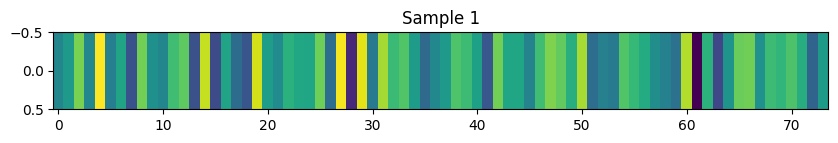

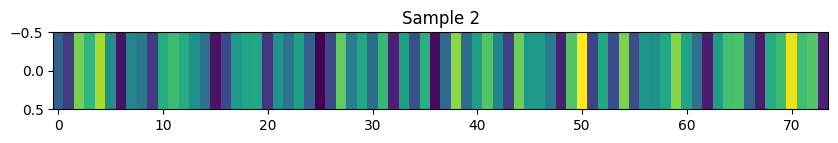

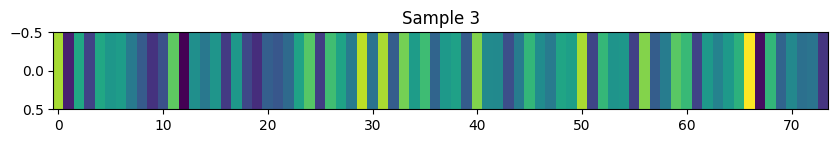

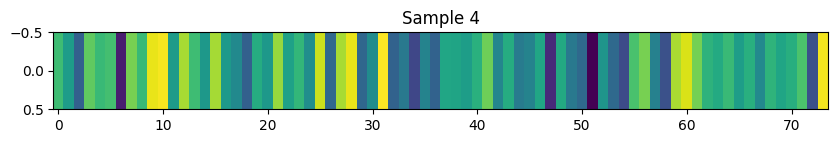

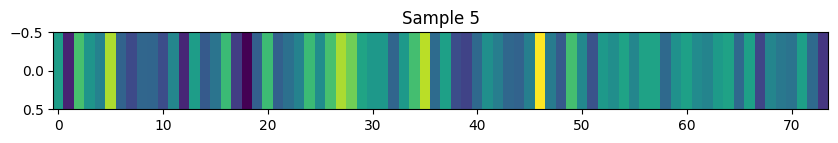

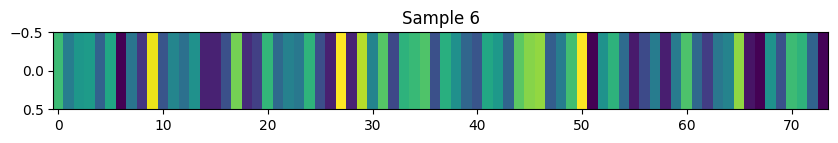

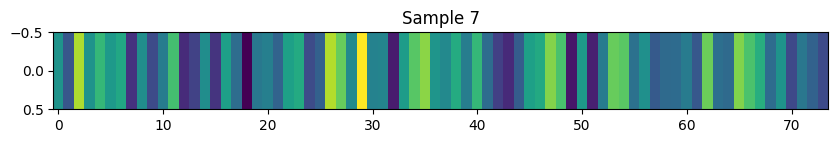

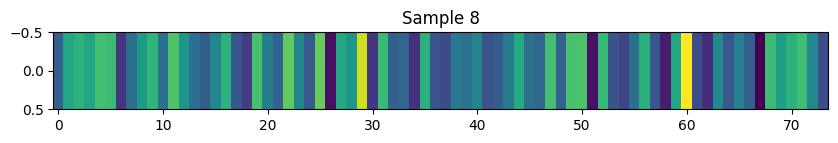

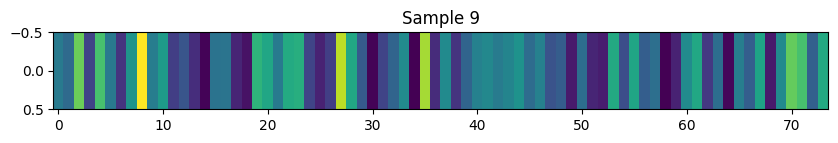

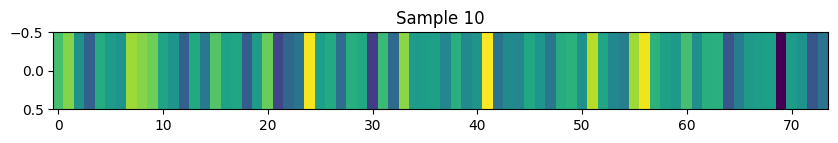

In [2]:
#evaluating GAN
import matplotlib.pyplot as plt

def plot_generated_samples(generator, latent_dim, num_samples=10):
    noise = np.random.normal(0, 1, (num_samples, latent_dim))
    generated_samples = generator.predict(noise)
    for i in range(num_samples):
        plt.figure(figsize=(10, 1))
        plt.imshow(generated_samples[i].reshape(1, -1), aspect='auto')
        plt.title(f'Sample {i+1}')
        plt.show()

plot_generated_samples(generator, latent_dim)


In [3]:
#generating synthetic data
def generate_synthetic_data(generator, latent_dim, num_samples):
    noise = np.random.normal(0, 1, (num_samples, latent_dim))
    synthetic_data = generator.predict(noise)
    return synthetic_data

synthetic_data = generate_synthetic_data(generator, latent_dim, 1000)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [4]:
#merging synthetic data with real data
synthetic_df = pd.DataFrame(synthetic_data, columns=X.columns)
combined_df = pd.concat([X, synthetic_df], axis=0)
combined_df = pd.concat([X, synthetic_df], axis=0, ignore_index=True)

# Define the file name for the combined dataset
file_name = 'combined_data.csv'

# Save the combined dataset to a CSV file
combined_df.to_csv(file_name, index=False)

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Load the combined dataset
df = pd.read_csv('combined_data.csv')

# Define features and target
X = df.drop('fraud', axis=1)
y = df['fraud']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define and train models
log_reg = LogisticRegression(max_iter=1000)
rf_clf = RandomForestClassifier()
gb_clf = GradientBoostingClassifier()

# Fit the models
log_reg.fit(X_train_scaled, y_train)
rf_clf.fit(X_train_scaled, y_train)
gb_clf.fit(X_train_scaled, y_train)

# Predict and evaluate each model
y_pred_log_reg = log_reg.predict(X_test_scaled)
y_pred_rf = rf_clf.predict(X_test_scaled)
y_pred_gb = gb_clf.predict(X_test_scaled)

accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_gb = accuracy_score(y_test, y_pred_gb)

print(f"Logistic Regression Accuracy: {accuracy_log_reg:.4f}")
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print(f"Gradient Boosting Accuracy: {accuracy_gb:.4f}")

# Assign weights based on accuracy
accuracy_dict = {'log_reg': accuracy_log_reg, 'rf': accuracy_rf, 'gb': accuracy_gb}
weights = {k: v / sum(accuracy_dict.values()) for k, v in accuracy_dict.items()}

print(f"Model Weights: {weights}")

# Define weighted voting classifier
voting_clf = VotingClassifier(
    estimators=[
        ('log_reg', log_reg),
        ('rf', rf_clf),
        ('gb', gb_clf)
    ],
    voting='soft',  # Use 'soft' voting to use probabilities
    weights=[weights['log_reg'], weights['rf'], weights['gb']]  # Apply weights
)

# Fit the voting classifier
voting_clf.fit(X_train_scaled, y_train)

# Predict and evaluate the voting classifier
y_pred_voting = voting_clf.predict(X_test_scaled)
accuracy_voting = accuracy_score(y_test, y_pred_voting)

print(f"Ensemble Voting Classifier Accuracy: {accuracy_voting:.4f}")


KeyError: "['fraud'] not found in axis"

In [6]:
print(df.columns)

Index(['step', 'age', 'amount', 'customer_transaction_count', 'gender_'F'',
       'gender_'M'', 'gender_'O'', 'zipcodeOri_'28007'',
       'merchant_'M1053599405'', 'merchant_'M117188757'',
       'merchant_'M1198415165'', 'merchant_'M1294758098'',
       'merchant_'M1313686961'', 'merchant_'M1352454843'',
       'merchant_'M1353266412'', 'merchant_'M1400236507'',
       'merchant_'M1416436880'', 'merchant_'M151143676'',
       'merchant_'M1535107174'', 'merchant_'M1600850729'',
       'merchant_'M1649169323'', 'merchant_'M1726401631'',
       'merchant_'M17379832'', 'merchant_'M1741626453'',
       'merchant_'M1748431652'', 'merchant_'M1788569036'',
       'merchant_'M1823072687'', 'merchant_'M1842530320'',
       'merchant_'M1872033263'', 'merchant_'M1873032707'',
       'merchant_'M1888755466'', 'merchant_'M1913465890'',
       'merchant_'M1946091778'', 'merchant_'M2011752106'',
       'merchant_'M2080407379'', 'merchant_'M209847108'',
       'merchant_'M2122776122'', 'merchant_'M3